<a href="https://colab.research.google.com/github/bappaditya-paul/Feauture-Enginnering/blob/main/Feauture_enginnering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature engineering is an important area in the field of machine learning and data analysis. It helps in data cleaning process where data scientists and analysts spend most of their time on. Here are few examples of feature engineering techniques,

1) Outlier detection and removal
2) One hot encoding
3) Log transform
4) Dimensionality reduction using principal component analysis (a.k.a. PCA)
5) Handling missing values
6) Scaling

In [9]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')
df

Detect Outliers

In [ ]:
max_threshold = df.price.quantile(0.95)
print(max_threshold)

In [ ]:
min_threshold = df['price'].quantile(0.05)
print(min_threshold)

In [ ]:
df[df.price> max_threshold]

In [ ]:
df[df.price < min_threshold]

Remove Outliers

In [ ]:
t =df[(df['price']< max_threshold) & df['price']> min_threshold]
t.head()

In [ ]:
min_thresold, max_thresold = df.price.quantile([0.01,0.999])
min_thresold, max_thresold

In [ ]:
df[df.price<min_thresold]

In [ ]:
df2 = df[(df.price>min_thresold)&(df.price<max_thresold)]
df2.shape

In [ ]:
df2.sample(5)

In [ ]:
df2.price.describe()

# Outlier detection and removal: z score, standard deviation | Feature engineering tutorial python

Exercise: Outlier removal using standard deviation and z score
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [ ]:
data = pd.read_csv("bhp.csv")
data.head()

In [ ]:
lower, upper = data.price.quantile([0.001,0.999])


In [ ]:
data[data.price<lower]

In [ ]:
data[data.price>upper]

In [ ]:
data.price.describe()

remove the outliers

In [14]:
new_dataset = data[(data.price>lower) & (data.price<upper)]
new_dataset

AttributeError: 'DataFrame' object has no attribute 'price'

In [ ]:
new_dataset.price.describe()

In [ ]:
# 3 standard deviation to remove outliers
upper_limits = new_dataset.price.mean()+3*new_dataset.price.std()
lower_limits = new_dataset.price.mean() - 3*new_dataset.price.std()



In [ ]:
# to detect outliers
new_dataset[(new_dataset.price<lower_limits)|(new_dataset.price>upper_limits)]

In [13]:
# remove outliers
new_dataset2 = new_dataset[(new_dataset.price>lower_limits) & (new_dataset.price<upper_limits)]
new_dataset2

NameError: name 'new_dataset' is not defined

In [ ]:
new_dataset2.price.describe()

In [ ]:
new_dataset2.shape

In [ ]:
new_dataset.shape

In [ ]:
data.shape

### **Outliers detection and remove using Z-score**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import kagglehub
path = kagglehub.dataset_download("mustafaali96/weight-height")

Using Colab cache for faster access to the 'weight-height' dataset.


In [12]:
import os
data = pd.read_csv(os.path.join(path, "weight-height.csv"))
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


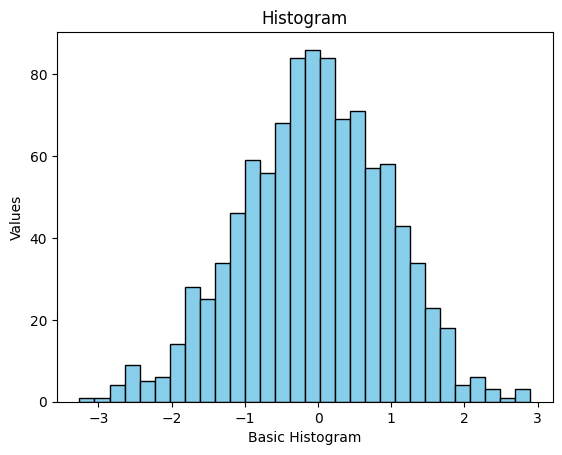

In [16]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randn(1000)

plt.hist(data, bins=30, color = 'skyblue', edgecolor='black')

plt.xlabel("Basic Histogram")
plt.ylabel("Values")
plt.title("Histogram")

plt.show()

In [ ]:
# her using z score find the outliers so finding
# z = x-u/lamda whre x = data point, u = mean of the
# dataset lamda= standard deviation

# if |z| > 3 ---> data point consider is outliers
# if |z| <= 3 ---> data point is not outliers



In [19]:
mean = data.mean()
print(mean)
stand_deviation = data.std()
print(stand_deviation)

-0.057139062138268595
0.9986847038527129


In [20]:
z = (data-mean)/stand_deviation
print(z)

[ 1.03053704e+00  1.81521005e-01 -4.59754490e-01  1.03447833e+00
 -1.18018673e+00  1.12532496e+00  6.87183728e-01 -2.40780613e+00
 -1.69172143e-01  5.91810618e-01 -2.84331772e+00  9.66707343e-01
 -8.39124190e-01 -9.30995800e-01  6.10073571e-01 -4.40640874e-01
  1.80339073e+00 -1.99390566e+00  1.73040849e+00  8.65193418e-01
 -1.35834786e+00 -2.38447577e-02 -7.11264201e-01 -5.46688030e-01
 -1.10569726e+00 -9.00231187e-01  1.99031524e+00 -4.51424100e-01
  8.89983710e-03 -9.85568775e-01  3.39015848e-01 -1.05552111e+00
 -3.09333326e-01  1.22964959e+00  1.08282707e+00 -2.44009288e-01
 -4.35330719e-02  1.73280797e+00  1.17876300e+00  6.28762904e-01
  1.92101194e-02 -2.78577616e+00 -4.58904488e-02 -9.51389569e-01
  1.38668310e+00  1.26586081e+00 -7.66336852e-02  1.39641210e+00
  1.15819604e+00 -1.21374435e+00 -2.24114431e-01 -5.18799831e-01
  1.12086055e+00  9.41584746e-01 -3.63688013e-01 -7.60210005e-01
  1.12989164e+00  1.11910029e+00  1.42224861e+00  6.28492979e-01
  7.15715746e-01 -3.54801

In [21]:
outliers = data[abs(z) > 3]
print(outliers)

[-3.25752178]


In [ ]:
# here |z| > 3 so here outliers detected

In [23]:
# remove outliers
data_clean = data[abs(z)<=3]
print(data_clean)

[ 9.72042517e-01  1.24143189e-01 -5.16288839e-01  9.75978623e-01
 -1.23577350e+00  1.06670576e+00  6.29140816e-01 -2.46177822e+00
 -2.26088694e-01  5.33893150e-01 -2.89671698e+00  9.08296775e-01
 -8.95159555e-01 -9.86910327e-01  5.52132082e-01 -4.97200363e-01
  1.74387967e+00 -2.04842214e+00  1.67099343e+00  8.06916370e-01
 -1.41370029e+00 -8.09524570e-02 -7.67467740e-01 -6.03108035e-01
 -1.16138200e+00 -9.56186178e-01  1.93055833e+00 -5.07969406e-01
 -4.82509310e-02 -1.04141152e+00  2.81430879e-01 -1.11127185e+00
 -3.66065523e-01  1.17089317e+00  1.02426377e+00 -3.00827405e-01
 -1.00614875e-01  1.67338976e+00  1.12007351e+00  5.70796833e-01
 -3.79542098e-02 -2.83925110e+00 -1.02969151e-01 -1.00727727e+00
  1.32772014e+00  1.20705676e+00 -1.33671951e-01  1.33743635e+00
  1.09953361e+00 -1.26928698e+00 -2.80958716e-01 -5.75256518e-01
  1.06224723e+00  8.83207222e-01 -4.20348718e-01 -8.16349166e-01
  1.07126643e+00  1.06048928e+00  1.36323887e+00  5.70527262e-01
  6.57635305e-01 -4.11473

In [ ]:
u =